In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/035/126/original/weight-height.csv?1684995383 -O weight-height.csv
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/035/131/original/dravid.csv?1684996749 -O dravid.csv
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/035/130/original/sehwag.csv?1684996594 -O sehwag.csv

--2024-01-24 19:46:45--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/035/126/original/weight-height.csv?1684995383
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 2600:9000:2153:ac00:11:1aff:4b00:21, 2600:9000:2153:9e00:11:1aff:4b00:21, 2600:9000:2153:2400:11:1aff:4b00:21, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|2600:9000:2153:ac00:11:1aff:4b00:21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428120 (418K) [text/plain]
Saving to: ‘weight-height.csv’

weight-height.csv   100%[===================>] 418.09K  --.-KB/s    in 0.09s   

2024-01-24 19:46:46 (4.32 MB/s) - ‘weight-height.csv’ saved [428120/428120]

--2024-01-24 19:46:46--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/035/131/original/dravid.csv?1684996749
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 2600:9000:2153:a400:11:1aff:4b00:21, 2600:9000:2153:2400:11:1aff:4b00:2

In [3]:
ll

total 12048
-rw-rw-r-- 1 thivakaranb 11850827 Jan 23 05:26 Descriptive_Statistics_May23_Batch.pdf
-rw-rw-r-- 1 thivakaranb    24177 May 25  2023 dravid.csv
-rw-rw-r-- 1 thivakaranb       72 Jan 24 19:44 Practice.ipynb
-rw-rw-r-- 1 thivakaranb      615 Jan 23 19:24 Required_data.txt
-rw-rw-r-- 1 thivakaranb    18584 May 25  2023 sehwag.csv
-rw-rw-r-- 1 thivakaranb   428120 May 25  2023 weight-height.csv


In [24]:
sehwag_df = pd.read_csv("sehwag.csv")
dravid_df = pd.read_csv("dravid.csv")
weight_height_df = pd.read_csv("weight-height.csv")

In [5]:
sehwag_df

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
0,1,5,2,0,0,50.00,7,lbw,1,NaN,v Pakistan,Mohali,1 Apr 1999,ODI # 1427
1,19,18,24,0,1,79.16,6,caught,1,NaN,v Zimbabwe,Rajkot,14 Dec 2000,ODI # 1660
2,58,62,54,8,0,107.40,6,bowled,1,NaN,v Australia,Bengaluru,25 Mar 2001,ODI # 1696
3,2,7,7,0,0,28.57,6,caught,2,NaN,v Zimbabwe,Bulawayo,27 Jun 2001,ODI # 1730
4,11,19,16,1,0,68.75,6,not out,2,NaN,v West Indies,Bulawayo,30 Jun 2001,ODI # 1731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,15,21,15,2,0,100.00,2,caught,1,NaN,v Sri Lanka,Hambantota,24 Jul 2012,ODI # 3292
241,3,6,6,0,0,50.00,2,caught,2,NaN,v Sri Lanka,Colombo (RPS),28 Jul 2012,ODI # 3293
242,34,46,29,6,0,117.24,2,caught,2,NaN,v Sri Lanka,Colombo (RPS),31 Jul 2012,ODI # 3294
243,4,20,11,1,0,36.36,2,bowled,1,NaN,v Pakistan,Chennai,30 Dec 2012,ODI # 3314


In [8]:
sehwag_df['Runs'].describe()

count    245.000000
mean      33.767347
std       34.809419
min        0.000000
25%        8.000000
50%       23.000000
75%       46.000000
max      219.000000
Name: Runs, dtype: float64

In [10]:
swg_p_25 = np.percentile(sehwag_df['Runs'],25)

In [12]:
swg_p_50 = np.percentile(sehwag_df['Runs'],50)
swg_p_75 = np.percentile(sehwag_df['Runs'],75)

In [13]:
swg_p_25,swg_p_50,swg_p_75

(8.0, 23.0, 46.0)

<Axes: ylabel='Runs'>

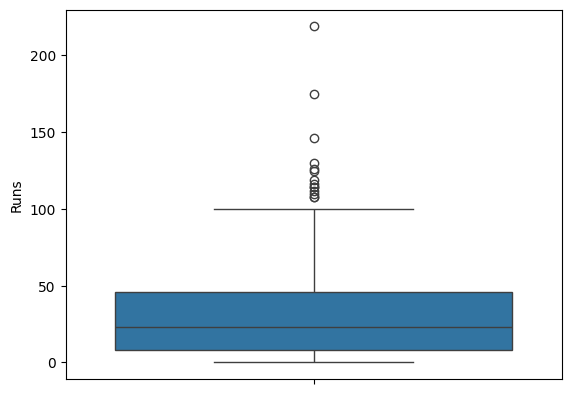

In [14]:
sns.boxplot(sehwag_df['Runs'])

In [16]:
SWG_IQR = swg_p_75 - swg_p_25

In [17]:
swg_upper_wskr = swg_p_75 + 1.5*SWG_IQR

In [18]:
swg_upper_wskr

103.0

In [19]:
SWG_IQR

38.0

In [20]:
swg_normal_range = sehwag_df['Runs'].max() - sehwag_df['Runs'].min()
swg_normal_range

219

In [21]:
swg_outlier = sehwag_df.loc[sehwag_df['Runs']>swg_upper_wskr]
swg_outlier

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
37,126,136,104,21,1,121.15,1,caught,2,NaN,v England,Colombo (RPS),22 Sep 2002,ODI # 1884
43,114,-,82,17,2,139.02,2,not out,2,NaN,v West Indies,Rajkot,12 Nov 2002,ODI # 1895
49,108,160,119,9,2,90.75,2,run out,2,NaN,v New Zealand,Napier,29 Dec 2002,ODI # 1927
53,112,175,139,11,3,80.57,2,caught,2,NaN,v New Zealand,Auckland,11 Jan 2003,ODI # 1933
75,130,193,134,15,2,97.01,1,caught,1,NaN,v New Zealand,Hyderabad (Deccan),15 Nov 2003,ODI # 2062
104,108,156,95,9,3,113.68,1,bowled,1,NaN,v Pakistan,Kochi,2 Apr 2005,ODI # 2235
163,114,127,87,17,3,131.03,3,caught,1,NaN,v Bermuda,Port of Spain,19 Mar 2007,ODI # 2542
182,119,150,95,12,5,125.26,2,caught,2,NaN,v Pakistan,Karachi,26 Jun 2008,ODI # 2717
192,116,165,90,17,0,128.88,1,run out,1,NaN,v Sri Lanka,Colombo (RPS),3 Feb 2009,ODI # 2813
198,125,106,74,14,6,168.91,2,not out,2,NaN,v New Zealand,Hamilton,11 Mar 2009,ODI # 2824


In [22]:
len(swg_outlier)

14

In [25]:
drvd_P_25 = np.percentile(dravid_df['Runs'],25)
drvd_P_50 = np.percentile(dravid_df['Runs'],50)
drvd_P_75 = np.percentile(dravid_df['Runs'],75)
drvd_P_25,drvd_P_50,drvd_P_75

(10.0, 26.0, 54.0)

In [26]:
dravid_df.describe()

,Runs,BF,4s,6s,SR,Pos,Inns,Unnamed: 9
count,318.000000,318.000000,318.000000,318.000000,318.00000,318.000000,318.000000,0.0
mean,34.242138,48.066038,2.987421,0.132075,66.89434,3.839623,1.481132,NaN
std,29.681822,34.286583,2.930289,0.429411,36.72385,1.107503,0.500431,NaN
min,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,1.000000,NaN
25%,10.000000,19.000000,1.000000,0.000000,46.75750,3.000000,1.000000,NaN
50%,26.000000,41.000000,2.000000,0.000000,66.45500,4.000000,1.000000,NaN
75%,54.000000,72.000000,4.000000,0.000000,81.98500,5.000000,2.000000,NaN
max,153.000000,153.000000,17.000000,3.000000,350.00000,8.000000,2.000000,NaN


In [27]:
normal_range = dravid_df['Runs'].max() - dravid_df['Runs'].min()
normal_range

153

In [29]:
drvd_iqr = drvd_P_75 - drvd_P_25
drvd_iqr

44.0

In [30]:
drvd_upper_wskr = drvd_P_75 + 1.5*drvd_iqr

In [31]:
drvd_upper_wskr

120.0

<Axes: ylabel='Runs'>

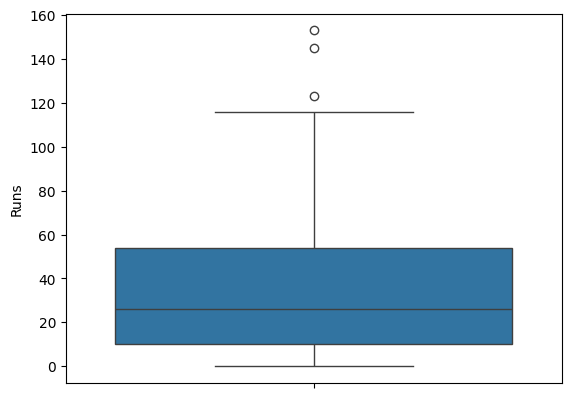

In [32]:
sns.boxplot(dravid_df['Runs'])

In [33]:
outlier_upper_wisker = dravid_df.loc[dravid_df['Runs']>drvd_upper_wskr]
outlier_upper_wisker

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
58,123,201,123,10,1,100.0,3,not out,1,NaN,v New Zealand,Taupo,9 Jan 1999,ODI # 1378
76,145,179,129,17,1,112.4,3,run out,1,NaN,v Sri Lanka,Taunton,26 May 1999,ODI # 1463
97,153,196,153,15,2,100.0,3,caught,1,NaN,v New Zealand,Hyderabad (Deccan),8 Nov 1999,ODI # 1523


In [34]:
len(outlier_upper_wisker)

3

In [36]:
weight_height_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<Axes: ylabel='Height'>

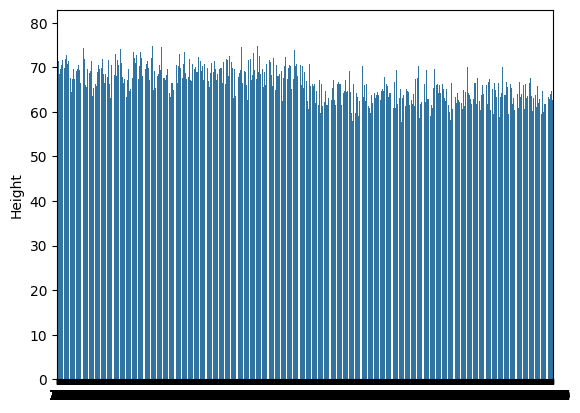

In [37]:
sns.barplot(weight_height_df['Height'])

In [38]:
plt.show()

In [39]:
import scipy

ModuleNotFoundError: No module named 'scipy'

In [40]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 3.9 MB/s eta 0:00:00m eta 0:00:010:00:01


In [43]:
import scipy.stats as stats

In [46]:
n=40 # Sample size

p=0.25 # probability of producing a defective bulb

k=10 # exactly 10
stats.binom.pmf(n=40,k=10,p=.25)

0.14436434635625667

In [48]:
stats.binom.pmf(n=10,k=3,p=.12)

0.08474297166326664

In [49]:
stats.binom.pmf(n=5,k=3,p=.6)

0.3455999999999997